<h1>Notes from Statistical Learning book

<h3>Hierarchical Clustering

Therefore, we recommend performing clustering with different choices of these parameters, and looking at the full set of results in order to see what patterns consistently emerge. Since clustering can be non-robust, we recommend clustering subsets of the data in order to get a sense of the robustness of the clusters obtained. Most importantly, we must be careful about how the results of a clustering analysis are reported. These results should not be taken as the absolute truth about a data set. <b>Rather, they should constitute a starting point for the development of a scientific hypothesis and further study, preferably on an independent data set.</b>

In order to perform clustering, some <b>decisions</b> must be made.
<ul>
    <li>• Should the observations or features first be <b>standardized</b> in some way? For instance, maybe the variables should be centered to have mean zero and scaled to have standard deviation one.</li>
<li>• In the case of hierarchical clustering,
    – What <b>dissimilarity measure</b> should be used?
    – What type of <b>linkage</b> should be used?
    – Where should we cut the dendrogram in order to obtain clusters?</li>
    <li>• In the case of K-means clustering, <b>how many clusters</b> should we look for in the data?</li>
</ul>
Each of these decisions can have a strong impact on the results obtained. In practice, we try several different choices, and look for the one with the most useful or interpretable solution. With these methods, there is no single right answer—<b>any solution that exposes some interesting aspects of the data should be considered.</b>


<h1>PCA

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
os.listdir('../../data')
assert 'out_breed.csv' in os.listdir('../../data') # this assert breaks if the data is configured uncorrectly

In [3]:
breeds = pd.read_csv('../../data/out_breed.csv')
colors = pd.read_csv('../../data/out_color.csv')
states = pd.read_csv('../../data/out_state.csv')
train  = pd.read_csv('../../data/out_train.csv')
test   = pd.read_csv('../../data/out_test.csv')
sub    = pd.read_csv('../../data/out_submission.csv')

In [8]:
train.columns

Index(['Unnamed: 0', 'Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender',
       'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength', 'Vaccinated',
       'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 'State',
       'RescuerID', 'VideoAmt', 'Description', 'PetID', 'PhotoAmt',
       'AdoptionSpeed', 'dataset_type'],
      dtype='object')

In [6]:
string_cols = ["Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description","PetID"]
categorical_col = ["Type","Gender","Vaccinated","Dewormed","Sterilized","Breed1","Breed2","Color1","Color2","Color3","State"]
numerical_col = [col for col in train.columns if col not in string_cols and col not in categorical_col and col != "AdoptionSpeed"]

In [12]:
from functools import reduce
from operator import __add__
num_train = train[numerical_col]
cat_num_train = train[reduce(__add__, [numerical_col] + [categorical_col])]

In [26]:
num_train.columns, len(num_train.columns)

(Index(['Age', 'MaturitySize', 'FurLength', 'Health', 'Quantity', 'Fee',
        'VideoAmt', 'PhotoAmt'],
       dtype='object'), 8)

In [27]:
cat_num_train.columns, len(cat_num_train.columns)

(Index(['Age', 'MaturitySize', 'FurLength', 'Health', 'Quantity', 'Fee',
        'VideoAmt', 'PhotoAmt', 'Type', 'Gender', 'Vaccinated', 'Dewormed',
        'Sterilized', 'Breed1', 'Breed2', 'Color1', 'Color2', 'Color3',
        'State'],
       dtype='object'), 19)

In [15]:
from sklearn import decomposition

In [18]:
pca = decomposition.PCA(n_components = 2)

In [19]:
num_train_reduced = pca.fit_transform(num_train)

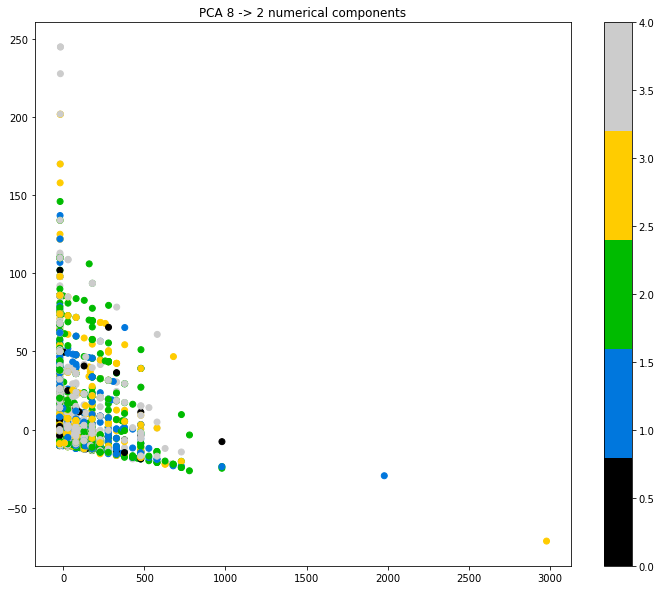

In [37]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,10))
plt.scatter(num_train_reduced[:, 0], num_train_reduced[:, 1],
            c=train['AdoptionSpeed'],
           cmap=plt.cm.get_cmap('nipy_spectral', 5))
plt.title("PCA 8 -> 2 numerical components")
plt.colorbar()
plt.show()

In [24]:
cat_num_train_reduced = pca.fit_transform(cat_num_train)

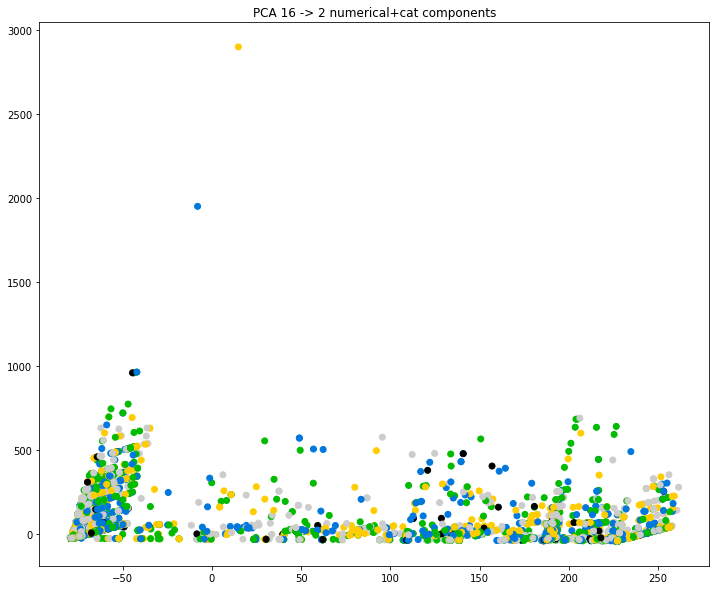

In [30]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,10))
plt.scatter(cat_num_train_reduced[:, 0], cat_num_train_reduced[:, 1],
            c=train['AdoptionSpeed'],
           cmap=plt.cm.get_cmap('nipy_spectral', 5))
plt.title("PCA 16 -> 2 numerical+cat components")
plt.show()

In [31]:
from sklearn.manifold import TSNE

In [32]:
tsne = TSNE(random_state=17)

In [33]:
reduce = tsne.fit_transform(num_train)

NameError: name 'reduced' is not defined

<Figure size 864x720 with 0 Axes>

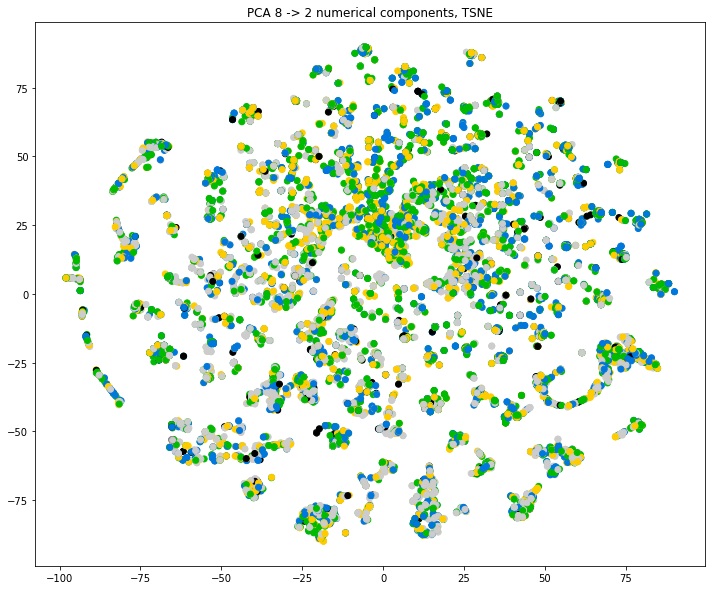

In [35]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,10))
plt.scatter(reduce[:, 0], reduce[:, 1],
            c=train['AdoptionSpeed'],
           cmap=plt.cm.get_cmap('nipy_spectral', 5))
plt.title("PCA 8 -> 2 numerical components, TSNE")
plt.show()

In [36]:
reduce = tsne.fit_transform(cat_num_train)

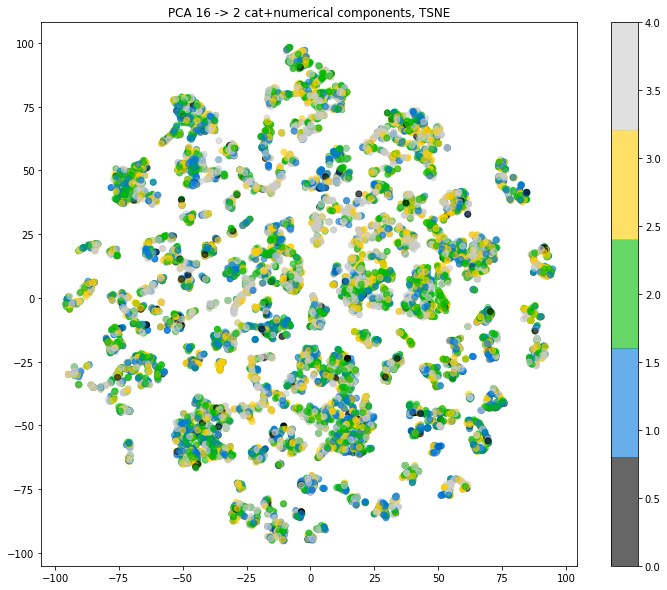

In [40]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,10))
plt.scatter(reduce[:, 0], reduce[:, 1],
            c=train['AdoptionSpeed'], alpha=0.6,
           cmap=plt.cm.get_cmap('nipy_spectral', 5))
plt.title("PCA 16 -> 2 cat+numerical components, TSNE")
plt.colorbar()
plt.show()

<h1>K-Means</h1>

In [41]:
from sklearn.cluster import KMeans

In [47]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(num_train)
    inertia.append(np.sqrt(kmeans.inertia_))

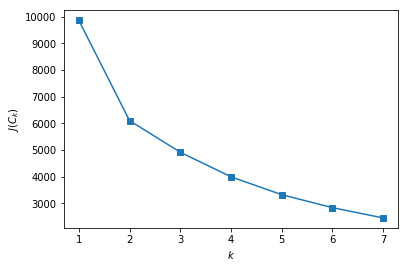

In [48]:
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

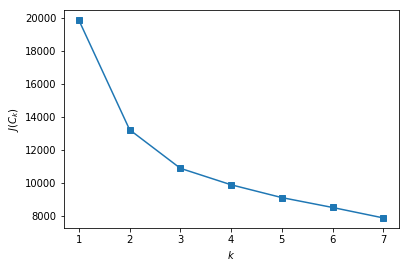

In [49]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(cat_num_train)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [57]:
kmeans = KMeans(n_clusters=2, random_state=1).fit(cat_num_train)

In [60]:
kmeans.labels_

array([0, 0, 0, ..., 1, 0, 1], dtype=int32)

In [74]:
kmeans.cluster_centers_

array([[1.07760122e+01, 1.85142293e+00, 1.42714786e+00, 1.03977018e+00,
        1.54286740e+00, 2.02521770e+01, 5.70966873e-02, 3.79809678e+00,
        1.46117246e+00, 1.75338899e+00, 1.72852141e+00, 1.56378490e+00,
        1.91534249e+00, 2.70980339e+02, 3.04219409e+00, 2.24607236e+00,
        3.20298052e+00, 1.80877996e+00, 4.13465845e+04],
       [9.51582771e+00, 1.89257914e+00, 1.58406850e+00, 1.02750389e+00,
        1.67202906e+00, 2.41728075e+01, 5.57861962e-02, 4.15256876e+00,
        1.44732745e+00, 1.84198236e+00, 1.73897250e+00, 1.54411002e+00,
        1.91100156e+00, 2.48775817e+02, 2.79123249e+02, 2.19979242e+00,
        3.28022833e+00, 2.09366892e+00, 4.13444209e+04]])

In [63]:
np.bincount(kmeans.labels_)

array([11139,  3854])

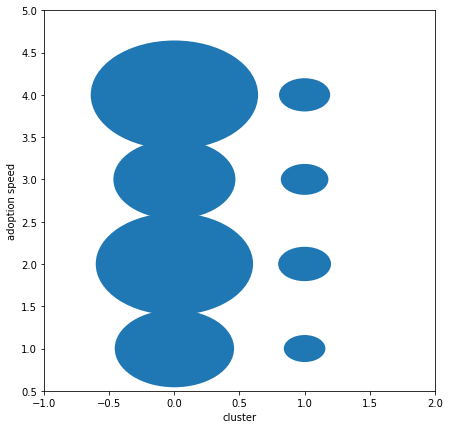

In [69]:
from collections import Counter
circles = Counter([*zip(kmeans.labels_, train['AdoptionSpeed'])])
from matplotlib import pyplot as plt
from operator import truediv
fig, ax = plt.subplots(figsize=(7,7))
ax.set_xlim((-1,  2))
ax.set_ylim((0.5, 5))
plt.xlabel("cluster")
plt.ylabel("adoption speed")
for key,val in circles.items():
    circle = plt.Circle(key,truediv(val,5000))
    ax.add_artist(circle)

In [94]:
from sklearn.metrics import silhouette_score
#better silhouette_score plot here https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

scores = [0]
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(cat_num_train)
    score = silhouette_score(cat_num_train, kmeans.predict(cat_num_train))
    scores.append(score)
    

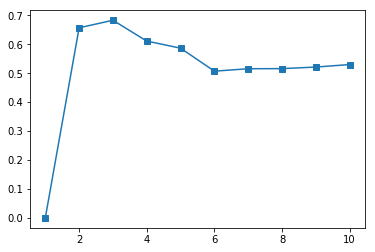

In [86]:
plt.plot(range(1, 11), scores, marker='s')

In [91]:
kmeans = KMeans(n_clusters=3, random_state=1).fit(cat_num_train)

In [92]:
kmeans.labels_

array([0, 0, 0, ..., 1, 0, 1], dtype=int32)

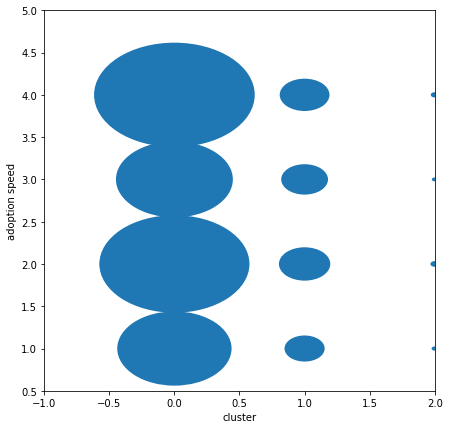

In [93]:
from collections import Counter
circles = Counter([*zip(kmeans.labels_, train['AdoptionSpeed'])])
from matplotlib import pyplot as plt
from operator import truediv
fig, ax = plt.subplots(figsize=(7,7))
ax.set_xlim((-1,  2))
ax.set_ylim((0.5, 5))
plt.xlabel("cluster")
plt.ylabel("adoption speed")
for key,val in circles.items():
    circle = plt.Circle(key,truediv(val,5000))
    ax.add_artist(circle)

<h1>Aggregate clustering</h1>

In [50]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

In [51]:
X = num_train

In [52]:
distance_mat = pdist(X)

In [53]:
Z = hierarchy.linkage(distance_mat, 'single')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

RecursionError: maximum recursion depth exceeded while getting the str of an object

<Figure size 720x360 with 0 Axes>

<h1>GAP statistic</h1>

In [81]:
#you need to implement yourself in Python

<h1>DBSCAN</h1>